<img src = "Logo_SEFIS_2023_-fundo-cinza-.png" width=200 style="float: right;" > 

# <center> XXVII Semana da Física </center>
 
## <center> Introdução aos Métodos Estatístico na Cosmologia - Parte 2<center>
<center> Cinthia Nunes de Lima <center>



### Conteúdo:

**1- Estimativas e probabilidade**

**2- Estimativa de parâmetros cosmológicos**

## Estimativa

É um procedimento aplicado aos dados que retorna um valor numérico para uma propriedade da população “parental” (da onde foi retirada a amostra dos dados).

Estimadores (â) tem 3 características:
1.	Consistência: um estimador é consistente se ele tende ao valor real (a) quando o numero de dados tende ao infinito. 

$$
\lim_{N \to \infty}  â = a
$$

2.	Viés: um estimador é não enviesado se o valor esperado é igual ao valor real.

$$
\left< â \right> = a
$$

3.	Eficiência: um estimador é eficiente se uma variância é pequena.



## Probabilidade

A probabilidade de ocorrência de um evento significa as chances deste ocorrer. Alguns dos conceitos chaves para entender a probabilidade são:

**Espaço Amostral $\Omega$:**
Conjunto de todos os possíveis resultados.

**Evento E:**
Subgrupo do espaço amostral com um ou mais resultados.

**Resultado:**
Resultado de uma única tentativa em um experimento.

A probabilidade clássica pode ser calculada quando cada resultado em um espaço amostral é igualmente provável de ocorrer. Assim:

$$
P(E) = \frac{n(E)}{n(\Omega)}
$$

Já quando falamos de probabilidade experimental, este conceito está atrelado a frequência de ocorrência de um evento. Então,

$$
P(E) = \frac{n^o \mbox{ de vezes de E ocorreu}}{n^o \mbox{ total de tentativas}}
$$

A probabilidade condicional é a chance de um evento A ocorrer condicionada a outro evento B. Podemos calculá-la através do teorema de Bayes:
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

Em que: 

$P(A|B)$ é a posterior: probabilidade à posteriori de A;
        
$P(B|A)$ é a verossimilhança: a probabilidade de B condicionada a A;
        
$P(A)$ é o prior: informação à priori de A;
        
$P(B)$ é a evidência dos dados.


## Estimador de máxima verossimilhança

Considerando o teorema de Bayes e a probabilidade de certo conjunto de dados, pode-se estimar os parâmetros de um modelo que os descreva.

Dado um conjunto de dados $ X = \{x_1, x_2, ..., x_n\}$, a probabilidade desses dados serem obtidos, considerando um conjunto de parâmetros $W = \{wi\}$, é definida como verossimilhança dos dados e pode ser escrita como a combinação da probabilidade de cada dado do conjunto:

\begin{equation}
    \mathscr{L}(X|W) = \prod_{ i = 1 } ^{ n }  P (x_i | W)
\end{equation}

A partir disto, pode-se definir a quantidade ${\chi }^2 = - 2 ln \mathscr{L}$, de forma que

\begin{equation}
    \chi ^2 = - 2 ln (\mathscr{L}(X|w)) = \sum_{ i = 1 } ^{ n } - 2 ln( P (x_i| w)).
\end{equation}

Fazendo a minimização de $\chi^2$ em relação à W, pode-se encontrar o conjunto de parâmetros que maximiza a probabilidade dos dados. Ou seja, o estimador dos parâmetros que resultam na máxima verossimilhança é 

\begin{equation}
                \hat{W} = arg \ \underset{w \in W}{min} \left\{ \chi ^2 \right\} = arg \ \underset{w \in W}{min} \left\{  -2 \ ln \left(\mathscr{L}(X|W) \right) \right\}.
\end{equation}

## Informação de Fisher

A informação de Fisher nos mostra o quanto de informação sobre um parâmetro está contida nos dados. É definida como
$$
\textbf{I}_n (\textbf{W}) = - \left< ( \nabla^2 \mathscr{L} (\textbf{W}) ) \right>,
$$

$$
\nabla^2 \mathscr{L} (\textbf{W}) = \begin{pmatrix}
    \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial  {w_1}^2} & \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial w_1 \partial  w_2} & \cdots &  \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial w_1 \partial  w_d} \\
    \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial w_2 \partial  w_1}& \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial  {w_2}^2} & \cdots &  \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial w_2 \partial  w_d} \\
    \vdots & \vdots & \ddots & \vdots \\
     \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial w_d \partial  w_1} &  \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial w_d \partial  w_2} & \cdots      &  \frac{\partial^2 \mathscr{L} (\textbf{W})}{\partial {w_d}^2}
\end{pmatrix}.
$$

Com a matriz de informação de Fisher é possível construir intervalos de confiança para os parâmetros.

## Estimativa de parâmetros cosmológicos


In [14]:
# NumCosmo:
try:
  import gi
  gi.require_version('NumCosmo', '1.0')
  gi.require_version('NumCosmoMath', '1.0')
except:
  pass

from gi.repository import GObject
from gi.repository import NumCosmo as Nc
from gi.repository import NumCosmoMath as Ncm

import matplotlib.pyplot as plt
import scipy
import numpy as np
from sympy import *
import scipy.stats as scs

from numpy import sqrt, log10, sinh, exp
from numpy import log as ln

from scipy.integrate import quad #Integrate
from sympy import diff, Symbol, symbols #Derivative
from scipy.optimize import minimize

c = 3*(10**5)

Ncm.cfg_init ()
cosmo = Nc.HICosmoDEXcdm() #Cosmology object

ser = Ncm.Serialize.new(0)
data = ser.from_file("/home/cinthia/NumCosmo/data/nc_data_snia_diag_legacy.obj")
lenz = data.y.len()

muobs = []
sigma = []
zobs = []
for i in range(lenz):
    mi = data.y.get(i)
    si = data.sigma.get(i)
    zi = data.x.get(i)
    
    muobs.append(mi)
    sigma.append(si)
    zobs.append(zi)

muobs = np.array(muobs)
zobs = np.array(zobs)
sigmaobs = np.array(sigma)

#### Módulo de distância de supernovas

In [11]:
def Dl(z, theta):
#Theta
    H0, Omega_m0, Omega_l0  = theta[0], theta[1], theta[2]

#Hubble function
#    E2z = Omega_l0 + Omega_k0*((1 + z) ** 2) + Omega_m0*((1 + z) ** 3) + Omega_r0*((1 + z) ** 4) 
#    Ez = E2z ** 0.5
    

#Comoving distance
    def integ(b):
        int_arg = lambda z: 1/((Omega_l0 + (Omega_m0 * ((1 + z) ** 3))) ** 0.5)
        result = quad(int_arg, 0, b)
        return result[0]

    dc_list = []
    for i in range(lenz):
        d = integ (z[i])     #(* c/H0)   
        dc_list.append(d)

    dc = np.array(dc_list)      
    Dc =  dc     #( * H0/c)

#Temporal comoving distance
#     if Omega_k0 == 0:
#         Dt = Dc
#     else:
#         Dt = sinh((sqrt(Omega_k0)) * Dc) / sqrt(Omega_k0)
   
    Dt = Dc

    
#Luminosity distance
    D_l = (1 + z) * Dt

    return D_l

def mu(z, theta): #This function calculates the distance modulus
#Modulus distance
    H0, Omega_m0, Omega_l0  = theta[0], theta[1], theta[2]
    DL = Dl(z, theta)
    mu = ( 5 * log10(DL) ) + 25 + ( 5 * log10(c / H0))
    
    return mu 

### Verossimilhança
Aqui calculamos a função de verossimilhança $\mathscr{L}$ e $\chi^2$:

\begin{equation}
    \chi^2 = -2 \mathscr{L}(w|x).
\end{equation}

In [15]:
def f_2lnL(theta): #This function calculates -2lnL (L is the Likelihood).
    arg = []
    mu_z = mu(zobs,theta)
    for i in range(lenz):
        argi = ( ( mu_z[i] - muobs[i] ) ** 2 ) / ( sigmaobs[i] ** 2 )
        arg.append(argi)
        
    return sum(arg)  

### Máxima Verossimilhança

Usamos a máxima verossimilhança dos dados para estimar os parâmetros $H_0$, $\Omega_m$, $\Omega_\lambda$.

In [17]:
def fit():
    x0 = [70.0, 0.25, 0.70]
    x0_np = np.array(x0)
    bnds = ((0, None), (0, 1.0), (0, 1.0))
    
    f = minimize(f_2lnL, x0_np, bounds = bnds, method='Nelder-Mead', tol=1e-6)
    
    return f

fit = fit()

print(f' [H0 Omega_m0 Omega_l0] \n', fit.x)

 [H0 Omega_m0 Omega_l0] 
 [71.11068429  0.25476161  0.71600742]


### Matriz de informação de Fisher

In [18]:
#Parameters and data
theta = fit.x
H0 = theta[0]
z = zobs

# factor: del(dc)/delOmega_lambda/m
def dOm(z, Omega):
    dc_list = []
    for i in range(lenz):
        
        H0, Omega_m0, Omega_l0  = theta[0], theta[1], theta[2]
        
        if Omega == 1:        #Omega_Lambda case
            int_arg = lambda z: -(0.5) * ((Omega_l0 + (Omega_m0 * ((1 + z) ** 3)))) ** (3/2)
            d = quad(int_arg, 0, z[i])
        
        else:                #Omega_m case
            
            int_arg = lambda z: -((1 + z) ** 3) * (0.5) * ((Omega_l0 + (Omega_m0 * ((1 + z) ** 3)))) ** (3/2)
            d = quad(int_arg, 0, z[i])
        
               
        dc_list.append(d[0])

    return np.array(dc_list)


#delmu/delH0
delmuH0 =  []

#delmu/delOmegalambda
delmuOL = []

#delmu/delOmegam
delmuOM = []

for k in range(lenz):
    delmuH0i =(- 5) / (H0 * ln(10))
    delmuOLi = (5 / (Dl(z, theta)[k] * ln(10)) * dOm(zobs, 1)[k])
    delmuOMi = (5 / (Dl(z, theta)[k] * ln(10)) * dOm(zobs, 2)[k])
    delmuOL.append(delmuOLi)
    delmuOM.append(delmuOMi)
    delmuH0.append(delmuH0i)


der = [delmuH0, delmuOL, delmuOM] #list of derivatives from mu

#Fisher Matrix
list_mn = []
for n in der:
    list_m = []
    for m in der:
        list_d = []
        for i in range(lenz):
            di = (1 / (sigma[i]) ** 2) * ( n[i] * m[i])
            list_d.append(di)
        list_m.append(sum(list_d))
    list_mn.append(list_m)
    
fisher_matrix = np.array(list_mn)                
print(f'The Fisher Information Matrix, Fij = < del(-lnL)/deltheta_i deltheta_j> (theta = [H0, OmegaLambda, Omegam]), is: \n', fisher_matrix)                


The Fisher Information Matrix, Fij = < del(-lnL)/deltheta_i deltheta_j> (theta = [H0, OmegaLambda, Omegam]), is: 
 [[4.20953415e+00 1.50749550e+02 2.95937950e+02]
 [1.50749550e+02 5.44394992e+03 1.11327621e+04]
 [2.95937950e+02 1.11327621e+04 2.72277427e+04]]


### Regiões de confiança

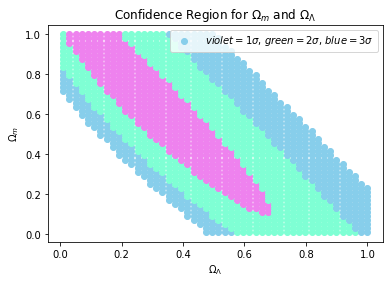

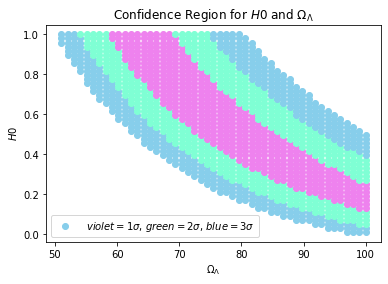

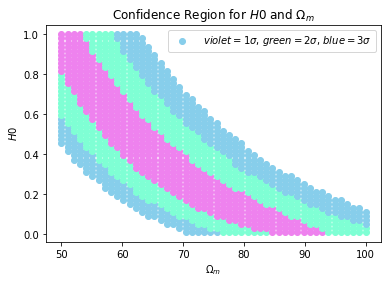

In [19]:
#chi² for 1sigma, 2sigma, 3sigma
chi_list = [scs.chi2.ppf(0.6827, 2), scs.chi2.ppf(0.9545, 2), scs.chi2.ppf(0.9973, 2)]

#-2lnL from the best fit
theta_fit = fit.x
f2lnL = f_2lnL(theta_fit)

#Intervals to the confidance test and plot
int1 = np.linspace(50 ,100, 50)
int2 = np.linspace(0.01 ,1, 50)
int3 = np.linspace(0.01 ,1, 50)
inter =[int1, int2, int3]

#Define the confidence interval and plot
for k in range(3):
    for i in range(50):
        for j in range(50):

            theta1 = [theta_fit[0], inter[1][i], inter[2][j]]      #fixing theta[0]
            theta2 = [inter[0][i], theta_fit[1], inter[2][j]]      #fixing theta[1]
            theta3 = [inter[0][i], inter[1][j], theta_fit[2]]      #fixing theta[2]
            theta = [theta1, theta2, theta3]

            lambda_f = (f_2lnL(theta[k])/ (f2lnL))
            
            intervals =[[inter[1][i], inter[2][j]], [inter[0][i], inter[2][j]],
                        [inter[0][i], inter[1][j]]]
                        
            if  lambda_f < chi_list[0]:
                plt.scatter(intervals[k][0], intervals[k][1], color = 'violet')
                

            elif chi_list[0] < lambda_f < chi_list[1]:
                plt.scatter(intervals[k][0], intervals[k][1], color = 'aquamarine')
                

            elif chi_list[1] < lambda_f < chi_list[2]:
                plt.scatter(intervals[k][0], intervals[k][1], color = 'skyblue')
                

    #Plot settings    
    labels = [['\Omega_m','\Omega_\Lambda'], ['H0', '\Omega_\Lambda'], ['H0', '\Omega_m']]
    plt.title(f'Confidence Region for ${labels[k][0]}$ and ${labels[k][1]}$')
    plt.ylabel(f'${labels[k][0]}$')
    plt.xlabel(f'${labels[k][1]}$')
    plt.legend([f' $violet = 1\sigma$, $green = 2\sigma$, $blue = 3\sigma$ '])
    plt.show()
